In [2]:
import pandas as pd
df = pd.read_csv('../../data/final_df_points_18_21.csv')
df.head()

,bike_id,lat,lng,dt_start,dt_end,hex_id,in_zone,zone_name,end_station_number,temp,...,snow,wind_speed,humidity,year,month,day,start_min,over_night,idle_time_next_day,idle_time
0,3694,51.323619,12.335887,1514764029,1514764799,881f1a8d91fffff,1,Pinke Zone Leipzig West 1€,4094,10.80,...,0.0,7.2,76.0,2017,12,6,1427,1,821,12
1,2508,51.323619,12.335887,1514764035,1514764799,881f1a8d91fffff,1,Pinke Zone Leipzig West 1€,4094,10.80,...,0.0,7.2,76.0,2017,12,6,1427,1,1439,12
2,41851,51.332415,12.395158,1514764638,1514764799,881f1a1659fffff,1,Pinke Zone Leipzig Ost 1€,0,10.80,...,0.0,7.2,76.0,2017,12,6,1437,1,1439,2
3,3694,51.323619,12.335887,1514764800,1514814103,881f1a8d91fffff,1,Pinke Zone Leipzig West 1€,4094,10.86,...,0.0,9.3,76.0,2018,1,0,0,0,0,821
4,2508,51.323619,12.335887,1514764800,1514851199,881f1a8d91fffff,1,Pinke Zone Leipzig West 1€,4094,10.86,...,0.0,9.3,76.0,2018,1,0,0,1,878,1439


In [3]:
df = df.sort_values('dt_start').reset_index(drop=True)

In [4]:
df.tail()

,bike_id,lat,lng,dt_start,dt_end,hex_id,in_zone,zone_name,end_station_number,temp,...,snow,wind_speed,humidity,year,month,day,start_min,over_night,idle_time_next_day,idle_time
2543825,72058,51.317569,12.382730,1640897593,1640904368,881f1a1609fffff,1,Blaue Zone Leipzig Ost 0€,0,13.19,...,0.0,8.94,83.0,2021,12,3,1253,0,0,112
2543826,71949,51.334711,12.356763,1640897835,1640899343,881f1a1649fffff,1,Pinke Zone Leipzig Ost 1€,0,13.19,...,0.0,8.94,83.0,2021,12,3,1257,0,0,25
2543827,97785,51.367276,12.369792,1640898086,1640900985,881f1a8c8bfffff,1,Blaue Zone Leipzig Ost 0€,0,13.05,...,0.0,8.05,84.0,2021,12,3,1261,0,0,48
2543828,41738,51.366942,12.370322,1640900918,1640903516,881f1a8c8bfffff,1,Pinke Zone Leipzig Ost 1€,0,13.05,...,0.0,8.05,84.0,2021,12,3,1309,0,0,43
2543829,72028,51.332844,12.404319,1640903200,1640905163,881f1a165bfffff,1,Blaue Zone Leipzig Ost 0€,0,13.11,...,0.0,8.05,81.0,2021,12,3,1347,0,0,32


In [5]:
import numpy as np

years = ['2018','2019','2020','2021']
months = ['1','2','3','4','5','6','7','8','9','10','11','12']
list = []
for year in years:
    for month in months:
        list.append(f'{year}-{month}')

tsdata = pd.DataFrame({ 'date': list, 'bike_count': 0})
tsdata = tsdata.set_index('date')
tsdata

,bike_count
date,
2018-1,0
2018-2,0
2018-3,0
2018-4,0
2018-5,0
2018-6,0
2018-7,0
2018-8,0
2018-9,0


In [6]:
from matplotlib import pyplot as plt
import statistics
from tqdm import tqdm
df['time_start'] = pd.to_datetime(df['dt_start'],unit='s')

def count(year):
    for ind in tqdm(df.index):
        #if df['time_start'][ind].year == year:
            i = f"{df['time_start'][ind].year}-{df['time_start'][ind].month}"
            #print(i)
            try:
                tsdata['bike_count'][i] += 1
            except KeyError:
                print(i)
    return tsdata

def plot(year,tsdata):
    fig, ax = plt.subplots(figsize=(50,10))
    # plotting monthly data
    ax.plot(tsdata)
    ax.set_xlabel('month')
    ax.set_ylabel('rentals')

    labels = ['2018','2019','2020','2021']

    #plt.xticks(tsdata.index, labels)

    # show values
    ax.set_title(f'Rentals from years 2018 - 2021')
    plt.show()


  0%|          | 1312/2543830 [00:00<06:17, 6735.83it/s]

2017-12
2017-12
2017-12


100%|██████████| 2543830/2543830 [04:00<00:00, 10565.13it/s]


ValueError: The number of FixedLocator locations (48), usually from a call to set_ticks, does not match the number of ticklabels (4).

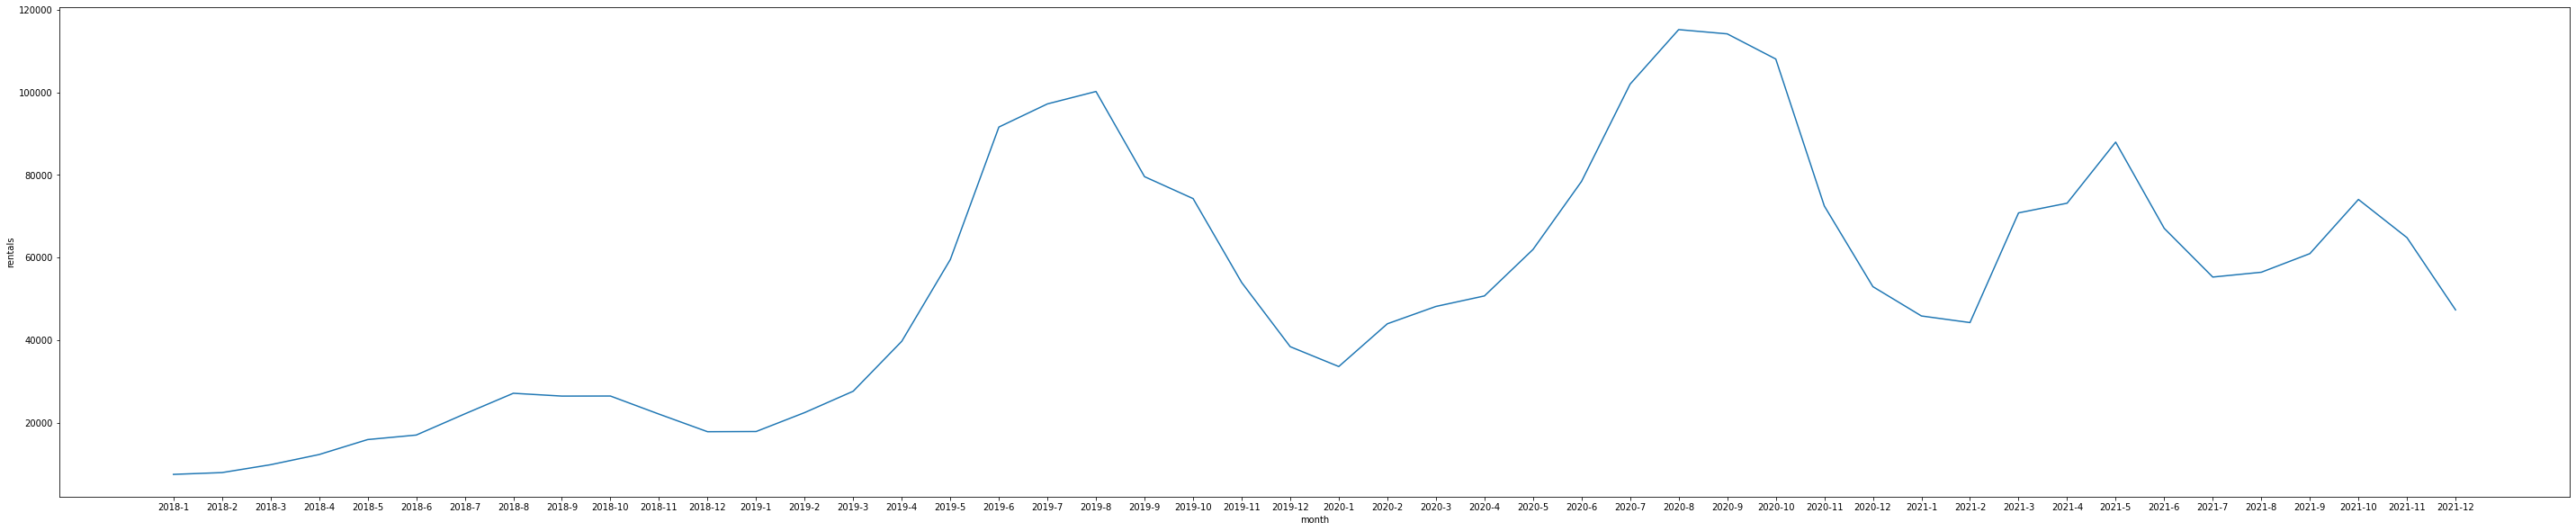

In [7]:
for year in [True]:
    tsdata = count(year)
    plot(year,tsdata)
    print(tsdata)

In [ ]:
plot('1',tsdata)